# Exercice 5 - Problem 2

#### Atuhors: Lluís Mas & Radu Spaimoc

This notebook contains the solution for the second part of the Exercice 5.

## Imports

In [128]:
from scipy.integrate import quad
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Functions

In [129]:
def get_signal_plot(ps, title, name):
    plt.figure(figsize=(12,7))
    ax1 = plt.axes(frameon=False)    
    xaxis = np.arange(0, 16)
    yaxis = np.array(ps)
    plt.step(xaxis, yaxis, linewidth=4,)
    plt.title(title, fontweight='bold')
    plt.savefig(name)
    plt.show()
    
def get_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel, name="no_name", ylim1=-0.1, ylim2=1.2, store=True):
    plt.figure(figsize=(12,7))
    ax1 = plt.axes(frameon=False)
    x=range(channel-11, channel+11)

    markerline, stemlines, baseline =  plt.stem(sig1AX, sig1AY, '-', 'None')
    plt.setp(stemlines, linewidth = 5)
    plt.setp(markerline, markersize = 5)

    markerline, stemlines, baseline = plt.stem(sig1BX, sig1BY, '-', 'None')
    plt.setp(stemlines, linewidth = 5)
    plt.setp(markerline, markersize = 5)

    markerline, stemlines, baseline =  plt.stem([channel-11,channel+11],[1.3,1.3])
    plt.xlabel('Frequency (MHz)')
    baseline.set_xdata([0,1])
    baseline.set_transform(plt.gca().get_yaxis_transform())
    plt.grid()
    plt.ylim(ylim1, ylim2)
    if store:    
        plt.savefig(name)
    plt.show()
    
def get_multi_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel,
                       sigxAX, sigxAY, sigxBX, sigxBY, channel2,
                       name="no_name", ylim1=-0.1, ylim2=1.2, store=True):
    plt.figure(figsize=(12,7))
    ax1 = plt.axes(frameon=False)
    x=range(channel2-11, channel2+11)

    markerline, stemlines, baseline =  plt.stem(sig1AX, sig1AY, '-', 'None')
    plt.setp(stemlines, linewidth = 5)
    plt.setp(markerline, markersize = 5)

    markerline, stemlines, baseline = plt.stem(sig1BX, sig1BY, '-', 'None')
    plt.setp(stemlines, linewidth = 5)
    plt.setp(markerline, markersize = 5)

    markerline, stemlines, baseline =  plt.stem(sigxAX, sigxAY, '-', 'None')
    plt.setp(stemlines, linewidth = 5, color='y')
    plt.setp(markerline, markersize = 5)

    markerline, stemlines, baseline = plt.stem(sigxBX, sigxBY, '-', 'None')
    plt.setp(stemlines, linewidth = 5, color='y')
    plt.setp(markerline, markersize = 5)

    
    markerline, stemlines, baseline =  plt.stem([channel-11,channel+11],[1.3,1.3])
    markerline, stemlines, baseline =  plt.stem([channel2-11,channel2+11],[1.3,1.3],'y')
    plt.xlabel('Frequency (MHz)')
    baseline.set_xdata([0,1])
    baseline.set_transform(plt.gca().get_yaxis_transform())
    plt.grid()
    plt.ylim(ylim1, ylim2)
    if store:    
        plt.savefig(name)
    plt.show()
 

def get_points_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel, name, ylim1=-0.1, ylim2=1.2):
    plt.figure(figsize=(12,7))
    ax1 = plt.axes(frameon=False)
    x=range(channel-11, channel+11)

    plt.scatter(sig1AX, sig1AY, label="a")
    plt.scatter(sig1BX, sig1BY, label="b")
    plt.xlabel('Frequency (MHz)')
    plt.grid()
    ax1.legend(title="Coefficients")
    plt.ylim(ylim1, ylim2)
    plt.savefig(name)
    plt.show()
    

def cosinus(t, T, n, d=1):
  return np.cos(2*np.pi*n*t/T/d) 

def sinus(t, T, n, d=1):
  return np.sin(2*np.pi*n*t/T/d)

def cosIntegral(t, T, n, period):
  return (2/T) * quad(cosinus, 0, T/period, args=(T, n))[0]
    
def sinIntegral(t, T, n, period):
  return (2/T) * quad(sinus, 0, T/period, args=(T, n))[0]

def fourrier(t, T, n, period):
  return (cosinus(t, T, n) * cosIntegral(t, T, n, period) + 
          sinus(t, T, n) * sinIntegral(t, T, n, period))

## Initial periodic signals

### - Channel 1 (101010) 

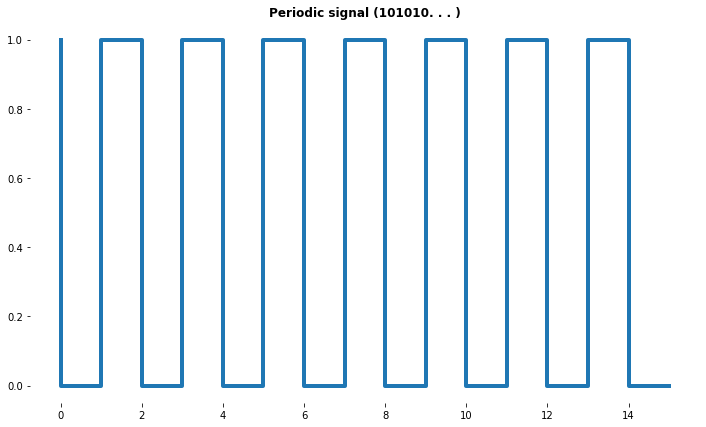

In [130]:
get_signal_plot(
    [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0], 
    'Periodic signal (101010. . . )', 
    'ps1.jpg')

### - Channel X (100100)

x = 6 or x = 3

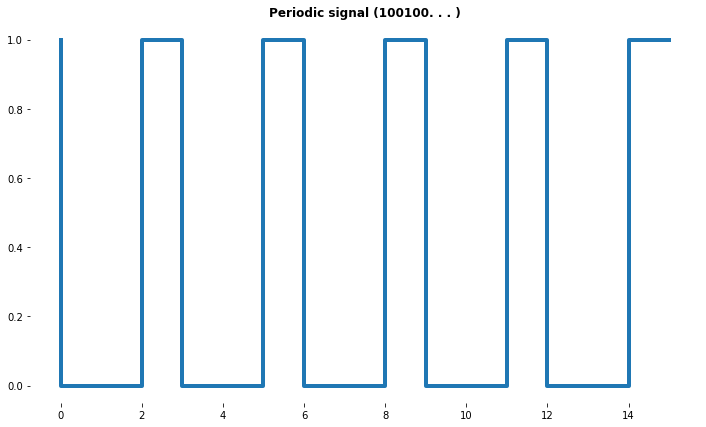

In [131]:
get_signal_plot(
    [1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
    'Periodic signal (100100. . . )', 
    'ps2.jpg')

## No interferences signals

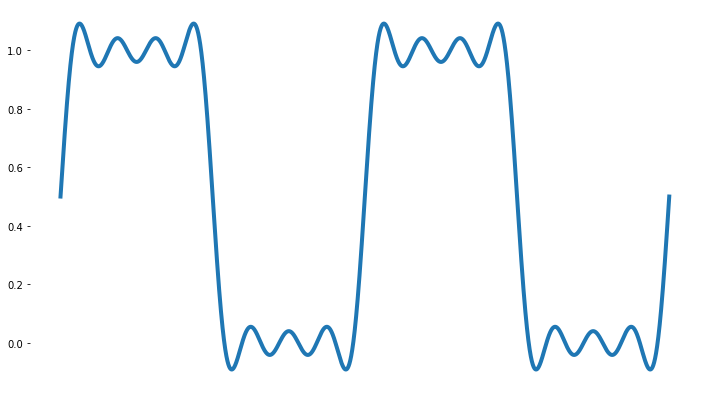

In [132]:
transmissionRate = 6*10**(6)
Tb = 1/transmissionRate
Ts = 2 * Tb

T1 = 1/3 *10**(-6)
y = 0.5

period = 2

t = np.linspace(0,Ts*2,10000)

for n in range(1,8):
  y += fourrier(t, T1, n, period)
  
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)    
plt.plot(t, y, linewidth=4)
ax1.axes.get_xaxis().set_visible(False)
plt.savefig('s1.jpg')
plt.show()

In [133]:
expected_t = t
expected_y = y

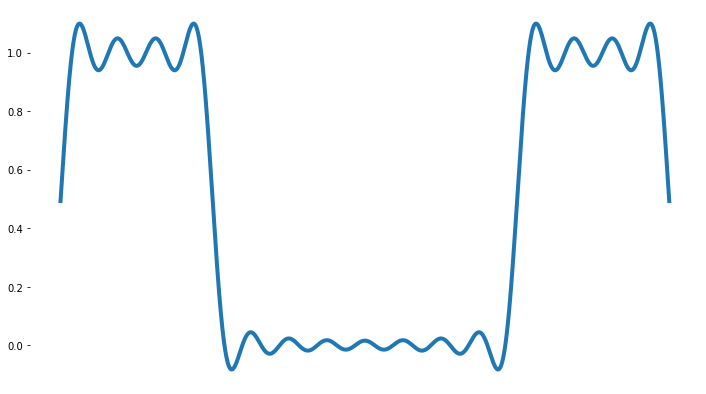

In [134]:
bittime = 10**(-6)/6
limit = 2*bittime
yx = 2/6
Tx = 1/2 *10**(-6)
period = 3

for n in range(1,12):
  yx += fourrier(t, Tx, n, period)

plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)
plt.plot(t, yx, linewidth=4)
ax1.axes.get_xaxis().set_visible(False)
plt.savefig('s2.jpg')
plt.show()

## Modulated Signals

### Channel 1

In [135]:
period = 2
channel1 = int(2401 + 22/2)

# A Coefficient
sig1AY = []
sig1AX = []

# Adding central one
sig1AY.append(cosIntegral(t, T1, 0, period))
sig1AX.append(channel1)

for n in range(1,4):
  sig1AY.append(cosIntegral(t, T1, n, period)/2)
  sig1AY.append(cosIntegral(t, T1, n, period)/2)   
  sig1AX.append(channel1 + n*3)
  sig1AX.append(channel1 - n*3)

# B Coefficient
sig1BY = []
sig1BX = []

# Adding central one
sig1BY.append(sinIntegral(t, T1, 0, period))
sig1BX.append(channel1)

for n in range(1,4):
  sig1BY.append(sinIntegral(t, T1, n, period)/2)    
  sig1BY.append(sinIntegral(t, T1, n, period)/2)   
  sig1BX.append(channel1 + n*3)
  sig1BX.append(channel1 - n*3)

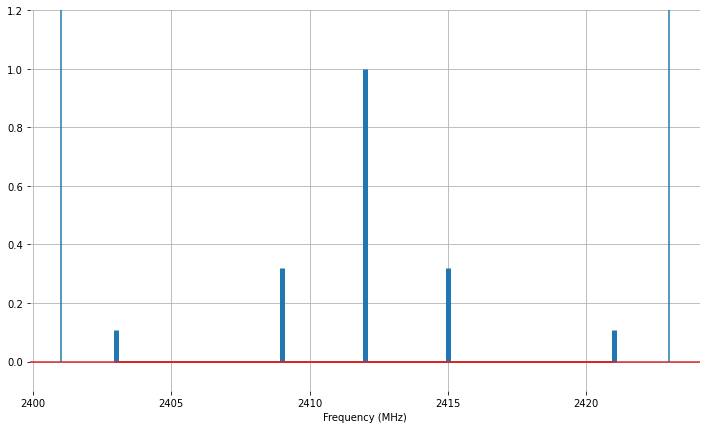

In [136]:
get_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel1, 'modulated_bs.jpg')

In [137]:
sig1AX

[2412, 2415, 2409, 2418, 2406, 2421, 2403]

In [138]:
sig1AY

[1.0,
 1.6491443556331193e-17,
 1.6491443556331193e-17,
 -6.938893903907228e-18,
 -6.938893903907228e-18,
 3.107000181239342e-17,
 3.107000181239342e-17]

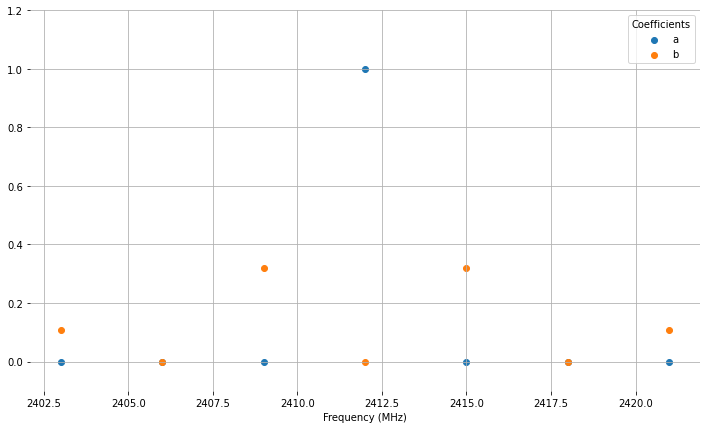

In [139]:
get_points_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel1, 'modulated_bs_coef.jpg')

### Channel 3

In [140]:
period = 3
channel3 = int(2401 + 10 + 22/2)
print(channel3)

# A Coefficient
sigxAY = []
sigxAX = []

sigxAY.append(cosIntegral(t, Tx, 0, period))
sigxAX.append(channel3)

for n in range(1,6):
  sigxAY.append(cosIntegral(t, Tx, n, period)/2)    
  sigxAY.append(cosIntegral(t, Tx, n, period)/2)   
  sigxAX.append(channel3 + n*2)
  sigxAX.append(channel3 - n*2)

# B Coefficient
sigxBY = []
sigxBX = []

sigxBY.append(sinIntegral(t, Tx, 0, period))
sigxBX.append(channel3)

for n in range(1,6):
  sigxBY.append(sinIntegral(t, Tx, n, period)/2) 
  sigxBY.append(sinIntegral(t, Tx, n, period)/2) 
  sigxBX.append(channel3 + n*2)
  sigxBX.append(channel3 - n*2)

2422


In [141]:
sigxAX

[2422, 2424, 2420, 2426, 2418, 2428, 2416, 2430, 2414, 2432, 2412]

In [142]:
sig1AX

[2412, 2415, 2409, 2418, 2406, 2421, 2403]

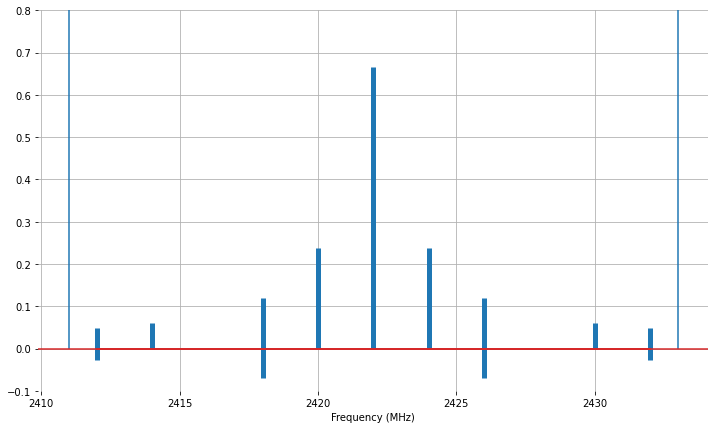

In [143]:
get_box_plot(sigxAX, sigxAY, sigxBX, sigxBY, channel3, 'modulated_bs2.jpg', ylim2=0.8)

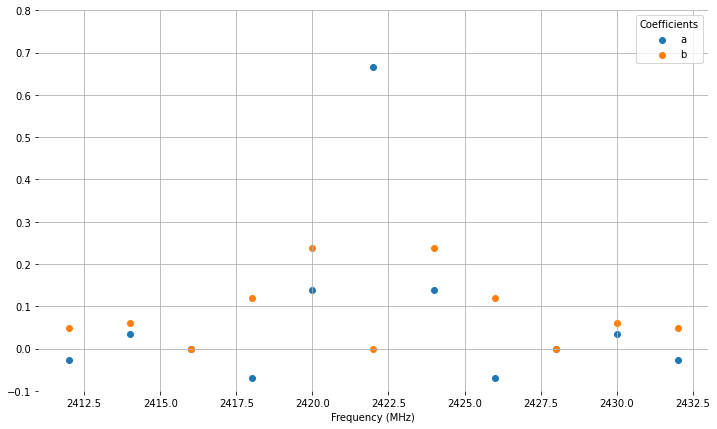

In [144]:
get_points_plot(sigxAX, sigxAY, sigxBX, sigxBY, channel3, 'modulated_bs2_coef.jpg', ylim2=0.8)

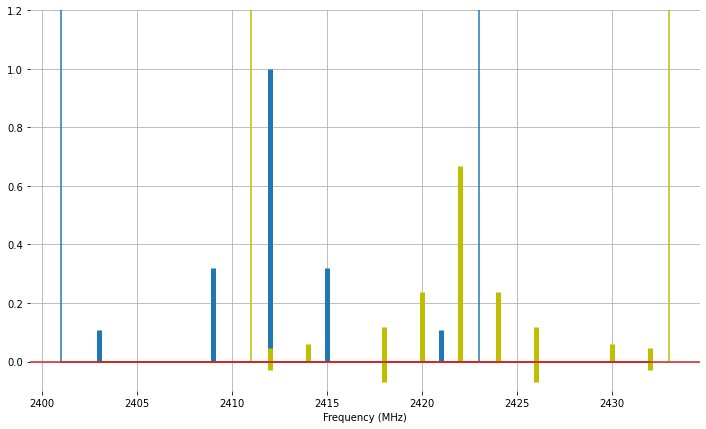

In [145]:
get_multi_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel1,
                       sigxAX, sigxAY, sigxBX, sigxBY, channel3,
                       name="channel_3_interference.jpg", ylim1=-0.1, ylim2=1.2, store=True)

# Demodulating Signals

### Signals Join

In [146]:
#Mapping a coeffs

mapArrayA = {}

for i in range(len(sig1AX)):
  if sig1AX[i] in mapArrayA:
    mapArrayA[sig1AX[i]] += sig1AY[i]
  elif(sig1AX[i] < 2423):
    mapArrayA[sig1AX[i]] = sig1AY[i]

for i in range(1, len(sigxAX)):
  if sigxAX[i] in mapArrayA:
    mapArrayA[sigxAX[i]] += sigxAY[i]
  elif(sigxAX[i] < 2423):
    mapArrayA[sigxAX[i]] = sigxAY[i] 
    
print(len(mapArrayA))  
print(sorted(mapArrayA))

10
[2403, 2406, 2409, 2412, 2414, 2415, 2416, 2418, 2420, 2421]


In [147]:
newArray = []

center = 2412
for i in sorted(mapArrayA):
  if i < center:
    result = mapArrayA[i]
    if (center-(i-center)) in mapArrayA:
      result +=  mapArrayA[center-(i-center)]
    newArray.append(result)
print(newArray)

[6.214000362478684e-17, -0.06891611192772401, 3.2982887112662386e-17]


In [148]:
#Mapping b coeffs
print("1")
print(sig1BY)
print(sig1BX)
print("3")
print(sigxBY)
print(sigxBX)

1
[0.0, 0.3183098861837907, 0.3183098861837907, -2.1878973727703183e-17, -2.1878973727703183e-17, 0.10610329539459697, 0.10610329539459697]
[2412, 2415, 2409, 2418, 2406, 2421, 2403]
3
[0.0, 0.23873241463784295, 0.23873241463784295, 0.11936620731892153, 0.11936620731892153, -1.535858528380856e-17, -1.535858528380856e-17, 0.05968310365946074, 0.05968310365946074, 0.04774648292756863, 0.04774648292756863]
[2422, 2424, 2420, 2426, 2418, 2428, 2416, 2430, 2414, 2432, 2412]


In [149]:
mapArrayB = {}

for i in range(len(sig1BX)):
  if sig1BX[i] in mapArrayB:
    mapArrayB[sig1BX[i]] += sig1BY[i]
  elif(sig1BX[i] < 2423):
    mapArrayB[sig1BX[i]] = sig1BY[i]

for i in range(1, len(sigxBX)):
  if sigxBX[i] in mapArrayB:
    mapArrayB[sigxBX[i]] += sigxBY[i]
  elif(sigxBX[i] < 2423):
    mapArrayB[sigxBX[i]] = sigxBY[i] 
    
print(len(mapArrayB))  
print(sorted(mapArrayB))

10
[2403, 2406, 2409, 2412, 2414, 2415, 2416, 2418, 2420, 2421]


In [150]:
newBrray = []
center = 2412
for i in sorted(mapArrayB):
  if i > center:
    result = mapArrayB[i]
    if (center-(i-center)) in mapArrayB:
      result +=  mapArrayB[center-(i-center)]
    newBrray.append(result)
print(newBrray)

[0.05968310365946074, 0.6366197723675814, -1.535858528380856e-17, 0.11936620731892147, 0.23873241463784295, 0.21220659078919393]


In [151]:
# Checking Values
T=T1
y = 0.5

print('transmissionRate = ' + str(transmissionRate))
print('Tb = ' + str(Tb))
print('Ts = ' + str(Ts))
print('T1 = ' + str(T1))
print('y = ' + str(y))
t = np.linspace(0, 2*T1, 100)
#print('t = ' + str(t))

transmissionRate = 6000000
Tb = 1.6666666666666668e-07
Ts = 3.3333333333333335e-07
T1 = 3.333333333333333e-07
y = 0.5


In [152]:
for n in range(max(len(newArray), len(newBrray))):
  if n < len(newArray):
    y += newArray[n]*(cosinus(t, T, (n+1),2))
  if n < len(newBrray):
    y += newBrray[n]*(sinus(t, T, (n+1),2))

print(y)

[ 0.43108389  0.69935523  0.94675506  1.15379096  1.3056503   1.39380477
  1.41683135  1.38035521  1.29613388  1.1804122   1.05176952  0.92874254
  0.82753085  0.76007551  0.73274599  0.74578603  0.79356614  0.86558343
  0.94805306  1.02586239  1.08461812  1.11251354  1.10177655  1.04952366
  0.95793234  0.83373908  0.68716245  0.53042475  0.37609376  0.23548157
  0.11731867  0.02687344 -0.03438418 -0.06855792 -0.08060427 -0.07724952
 -0.06572603 -0.0525278  -0.04237406 -0.03753053 -0.03757759 -0.03964307
 -0.03904448 -0.03022375 -0.00781481  0.03233262  0.09233897  0.17181979
  0.26782349  0.37518817  0.48725711  0.59683509  0.6972298   0.78320866
  0.85171553  0.90222921  0.93670329  0.95909395  0.9745489   0.98838717
  1.00503535  1.02709699  1.05471464  1.0853416   1.1139782   1.13385508
  1.13747404  1.11785671  1.0698124   0.99102478  0.8827762   0.7501755
  0.6018243   0.44893845  0.30402375  0.17927577  0.084922    0.02774338
  0.00999662  0.02891106  0.07685906  0.14220785  0.

In [153]:
t

array([0.00000000e+00, 6.73400673e-09, 1.34680135e-08, 2.02020202e-08,
       2.69360269e-08, 3.36700337e-08, 4.04040404e-08, 4.71380471e-08,
       5.38720539e-08, 6.06060606e-08, 6.73400673e-08, 7.40740741e-08,
       8.08080808e-08, 8.75420875e-08, 9.42760943e-08, 1.01010101e-07,
       1.07744108e-07, 1.14478114e-07, 1.21212121e-07, 1.27946128e-07,
       1.34680135e-07, 1.41414141e-07, 1.48148148e-07, 1.54882155e-07,
       1.61616162e-07, 1.68350168e-07, 1.75084175e-07, 1.81818182e-07,
       1.88552189e-07, 1.95286195e-07, 2.02020202e-07, 2.08754209e-07,
       2.15488215e-07, 2.22222222e-07, 2.28956229e-07, 2.35690236e-07,
       2.42424242e-07, 2.49158249e-07, 2.55892256e-07, 2.62626263e-07,
       2.69360269e-07, 2.76094276e-07, 2.82828283e-07, 2.89562290e-07,
       2.96296296e-07, 3.03030303e-07, 3.09764310e-07, 3.16498316e-07,
       3.23232323e-07, 3.29966330e-07, 3.36700337e-07, 3.43434343e-07,
       3.50168350e-07, 3.56902357e-07, 3.63636364e-07, 3.70370370e-07,
      

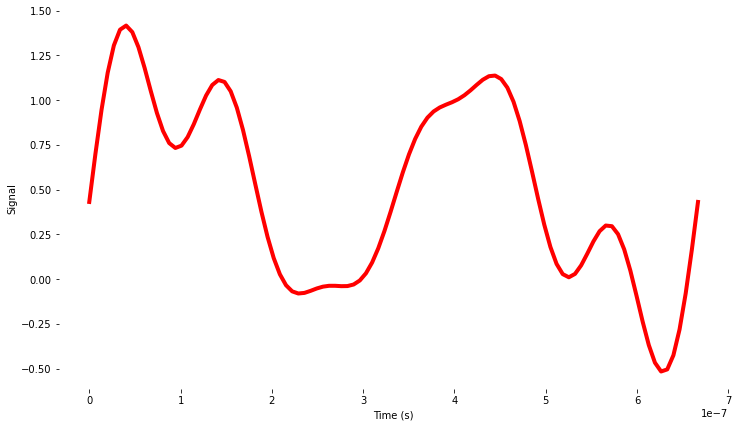

In [154]:
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)   
#plt.plot(t, y,  label="Expected signal.", color='tab:blue', linewidth=4)
plt.plot(t, y,  
         #label="Received signal (b') - Interf Channel 3. ", 
         linewidth=4, color='red')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0);
#h1 = np.array([1 for i in range(int(len(t)/4))])
#h2 = np.array([0 for i in range(int(len(t)/4),2*int(len(t)/4))])
#h3 = np.array([1 for i in range(2*int(len(t)/4),3*int(len(t)/4))])
#h4 = np.array([0 for i in range(3*int(len(t)/4),4*int(len(t)/4))])

#h = np.concatenate([h1, h2, h3, h4])
#plt.plot(t, h, 'tab:blue', linewidth=4)

plt.ylabel('Signal')
plt.xlabel('Time (s)')
#ax1.legend(loc=1)
plt.savefig("basewith interf.jpg")
plt.show()

# Modulating Signals

### Channel 1

In [155]:
period = 2
channel1 = int(2401 + 22/2)
print(channel1)

# A Coefficient
sig1AY = []
sig1AX = []

# Adding central one
sig1AY.append(cosIntegral(t, T1, 0, period))
sig1AX.append(channel1)

for n in range(1,4):
  sig1AY.append(cosIntegral(t, T1, n, period)/2)
  sig1AY.append(cosIntegral(t, T1, n, period)/2)   
  sig1AX.append(channel1 + n*3)
  sig1AX.append(channel1 - n*3)

# B Coefficient
sig1BY = []
sig1BX = []

# Adding central one
sig1BY.append(sinIntegral(t, T1, 0, period))
sig1BX.append(channel1)

for n in range(1,4):
  sig1BY.append(sinIntegral(t, T1, n, period)/2)    
  sig1BY.append(sinIntegral(t, T1, n, period)/2)   
  sig1BX.append(channel1 + n*3)
  sig1BX.append(channel1 - n*3)

2412


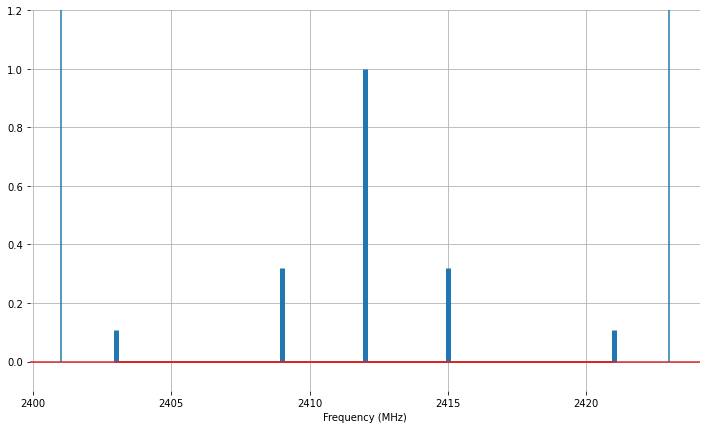

In [156]:
get_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel1, store=False)

In [157]:
# Checking Values
print('A')
print(sig1AY)
print(sig1AX)
print('\n')
print('B')
print(sig1BY)
print(sig1BX)

A
[1.0, 1.6491443556331193e-17, 1.6491443556331193e-17, -6.938893903907228e-18, -6.938893903907228e-18, 3.107000181239342e-17, 3.107000181239342e-17]
[2412, 2415, 2409, 2418, 2406, 2421, 2403]


B
[0.0, 0.3183098861837907, 0.3183098861837907, -2.1878973727703183e-17, -2.1878973727703183e-17, 0.10610329539459697, 0.10610329539459697]
[2412, 2415, 2409, 2418, 2406, 2421, 2403]


### Channel 6

In [158]:
period = 3
channel6 = int(2401 + 25 + 22/2)
print(channel6)

# A Coefficient
sigxAY = []
sigxAX = []

# Adding central one
sigxAY.append(cosIntegral(t, Tx, 0, period))
sigxAX.append(channel6)

for n in range(1,6):
  sigxAY.append(cosIntegral(t, Tx, n, period)/2)    
  sigxAY.append(cosIntegral(t, Tx, n, period)/2)   
  sigxAX.append(channel6 + n*2)
  sigxAX.append(channel6 - n*2)

# B Coefficient
sigxBY = []
sigxBX = []

# Adding central one
sigxBY.append(sinIntegral(t, Tx, 0, period))
sigxBX.append(channel6)

for n in range(1,6):
  sigxBY.append(sinIntegral(t, Tx, n, period)/2) 
  sigxBY.append(sinIntegral(t, Tx, n, period)/2) 
  sigxBX.append(channel6 + n*2)
  sigxBX.append(channel6 - n*2)

2437


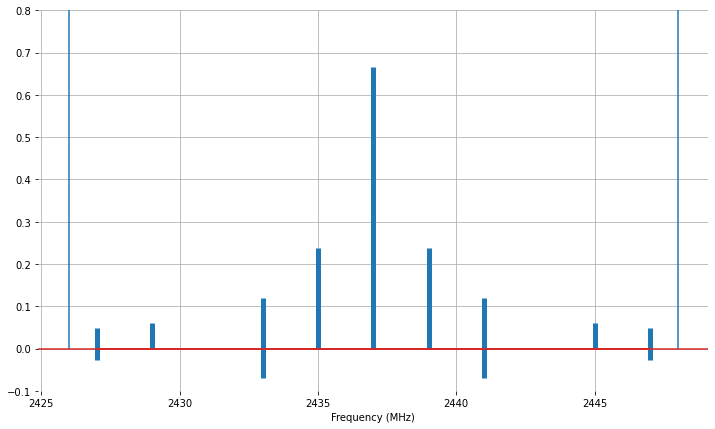

In [159]:
get_box_plot(sigxAX, sigxAY, sigxBX, sigxBY, channel6, name="channel6.jpg", ylim1=-0.1, ylim2=0.8, store=True)

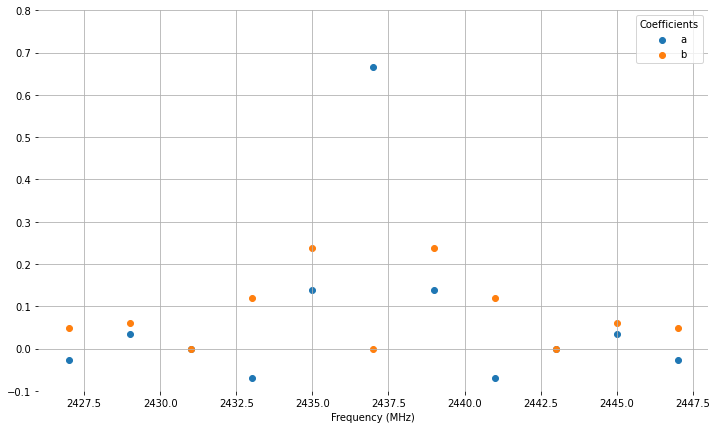

In [160]:
get_points_plot(sigxAX, sigxAY, sigxBX, sigxBY, channel6, 'channel6int.jpg', ylim2=0.8)

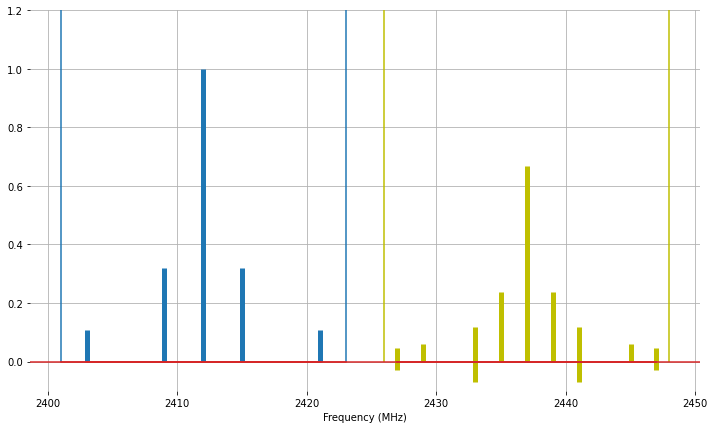

In [161]:
get_multi_box_plot(sig1AX, sig1AY, sig1BX, sig1BY, channel1,
                       sigxAX, sigxAY, sigxBX, sigxBY, channel6,
                       name="channel_6_interference.jpg", ylim1=-0.1, ylim2=1.2, store=True)

In [162]:
print(1)
print('A')
print(sig1AY)
print(sig1AX)
print('B')
print(sig1BY)
print(sig1BX)

print('\n')
print(6)
print('A')
print(sigxAY)
print(sigxAX)
print('B')
print(sigxBY)
print(sigxBX)

1
A
[1.0, 1.6491443556331193e-17, 1.6491443556331193e-17, -6.938893903907228e-18, -6.938893903907228e-18, 3.107000181239342e-17, 3.107000181239342e-17]
[2412, 2415, 2409, 2418, 2406, 2421, 2403]
B
[0.0, 0.3183098861837907, 0.3183098861837907, -2.1878973727703183e-17, -2.1878973727703183e-17, 0.10610329539459697, 0.10610329539459697]
[2412, 2415, 2409, 2418, 2406, 2421, 2403]


6
A
[0.6666666666666666, 0.13783222385544802, 0.13783222385544802, -0.068916111927724, -0.068916111927724, -3.2381504884900395e-17, -3.2381504884900395e-17, 0.034458055963862005, 0.034458055963862005, -0.027566444771089597, -0.027566444771089597]
[2437, 2439, 2435, 2441, 2433, 2443, 2431, 2445, 2429, 2447, 2427]
B
[0.0, 0.23873241463784295, 0.23873241463784295, 0.11936620731892153, 0.11936620731892153, -1.535858528380856e-17, -1.535858528380856e-17, 0.05968310365946074, 0.05968310365946074, 0.04774648292756863, 0.04774648292756863]
[2437, 2439, 2435, 2441, 2433, 2443, 2431, 2445, 2429, 2447, 2427]


### Joining Signals

In [163]:
# A coeffs
mapArrayA = {}

for i in range(len(sig1AX)):
  if sig1AX[i] in mapArrayA:
    mapArrayA[sig1AX[i]] += sig1AY[i]
  else:
    if(sig1AX[i] <= 2435):
      mapArrayA[sig1AX[i]] = sig1AY[i]

print(len(mapArrayA))  
print(sorted(mapArrayA))

for i in range(1, len(sigxAX)):
  if sigxAX[i] in mapArrayA:
    mapArrayA[sigxAX[i]] += sigxAY[i]
  else:
    if(sigxAX[i] <= 2435):
      mapArrayA[sigxAX[i]] = sigxAY[i] 
    
print(len(mapArrayA))  
print(sorted(mapArrayA))

7
[2403, 2406, 2409, 2412, 2415, 2418, 2421]
12
[2403, 2406, 2409, 2412, 2415, 2418, 2421, 2427, 2429, 2431, 2433, 2435]


In [164]:
newArray = []

center = 2412
for i in sorted(mapArrayA):
  if i < center:
    result = mapArrayA[i]
    if (center-(i-center)) in mapArrayA:
      result +=  mapArrayA[center-(i-center)]
    newArray.append(result)
print(newArray)

[6.214000362478684e-17, -1.3877787807814457e-17, 3.2982887112662386e-17]


In [165]:
# B coeffs
mapArrayB = {}

for i in range(len(sig1BX)):
  if sig1BX[i] in mapArrayB:
    mapArrayB[sig1BX[i]] += sig1BY[i]
  else:
      if(sig1BX[i] != 2412):
        mapArrayB[sig1BX[i]] = sig1BY[i]

print(len(mapArrayB))  
print(sorted(mapArrayB))

for i in range(1, len(sigxBX)):
  if sigxBX[i] in mapArrayB:
    mapArrayB[sigxBX[i]] += sigxBY[i]
  else:
    if(sigxBX[i] <= 2435):
      mapArrayB[sigxBX[i]] = sigxBY[i] 
    
print(len(mapArrayB))  
print(sorted(mapArrayB))

6
[2403, 2406, 2409, 2415, 2418, 2421]
11
[2403, 2406, 2409, 2415, 2418, 2421, 2427, 2429, 2431, 2433, 2435]


In [166]:
newBrray = []
center = 2412
for i in sorted(mapArrayB):
  if i > center:
    result = mapArrayB[i]
    if (center-(i-center)) in mapArrayB:
      result +=  mapArrayB[center-(i-center)]
    newBrray.append(result)
print(newBrray)

[0.6366197723675814, -4.3757947455406366e-17, 0.21220659078919393, 0.04774648292756863, 0.05968310365946074, -1.535858528380856e-17, 0.11936620731892153, 0.23873241463784295]


### Demodulating

In [167]:
# Checking Values
T=T1
y = 0.5

print('transmissionRate = ' + str(transmissionRate))
print('Tb = ' + str(Tb))
print('Ts = ' + str(Ts))
print('T1 = ' + str(T1))
print('y = ' + str(y))
t = np.linspace(0, 2*T1, 100)
#print('t = ' + str(t))

transmissionRate = 6000000
Tb = 1.6666666666666668e-07
Ts = 3.3333333333333335e-07
T1 = 3.333333333333333e-07
y = 0.5


In [168]:
for n in range(max(len(newArray), len(newBrray))):
  if n < len(newArray):
    y += newArray[n]*(cosinus(t, T, (n+1),1))
  if n < len(newBrray):
    y += newBrray[n]*(sinus(t, T, (n+1),1))

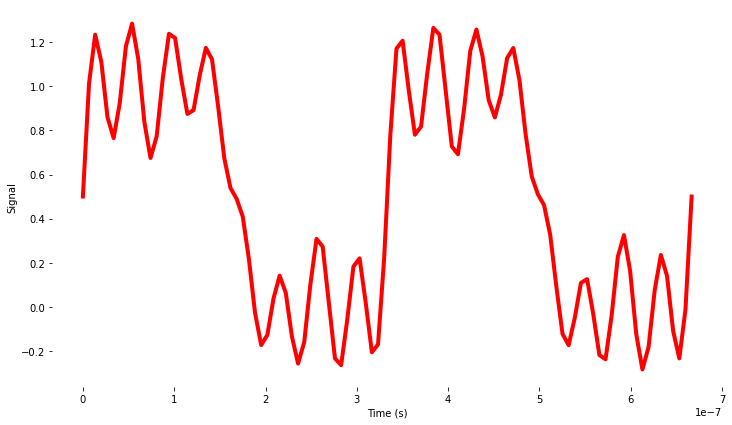

In [170]:
plt.figure(figsize=(12,7))
ax1 = plt.axes(frameon=False)   
#plt.plot(t, y,  label="Expected signal.", color='tab:blue', linewidth=4)
#plt.plot(expected_t, expected_y, linewidth=4)
plt.plot(t, y,
         #label="Received signal (b') - Interf Channel 6. ", 
         linewidth=4, color='red')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0);

plt.ylabel('Signal')
plt.xlabel('Time (s)')
#ax1.axes.get_xaxis().set_visible(False)
#ax1.legend(loc=1)
plt.savefig("basewith interf_2.jpg")
plt.show()

In [74]:
expected_t

array([0.00000000e+00, 6.66733340e-11, 1.33346668e-10, ...,
       6.66533320e-07, 6.66599993e-07, 6.66666667e-07])

In [75]:
expected_y

array([0.5      , 0.5032003, 0.5064005, ..., 0.4935995, 0.4967997,
       0.5      ])

In [76]:
t

array([0.00000000e+00, 6.73400673e-09, 1.34680135e-08, 2.02020202e-08,
       2.69360269e-08, 3.36700337e-08, 4.04040404e-08, 4.71380471e-08,
       5.38720539e-08, 6.06060606e-08, 6.73400673e-08, 7.40740741e-08,
       8.08080808e-08, 8.75420875e-08, 9.42760943e-08, 1.01010101e-07,
       1.07744108e-07, 1.14478114e-07, 1.21212121e-07, 1.27946128e-07,
       1.34680135e-07, 1.41414141e-07, 1.48148148e-07, 1.54882155e-07,
       1.61616162e-07, 1.68350168e-07, 1.75084175e-07, 1.81818182e-07,
       1.88552189e-07, 1.95286195e-07, 2.02020202e-07, 2.08754209e-07,
       2.15488215e-07, 2.22222222e-07, 2.28956229e-07, 2.35690236e-07,
       2.42424242e-07, 2.49158249e-07, 2.55892256e-07, 2.62626263e-07,
       2.69360269e-07, 2.76094276e-07, 2.82828283e-07, 2.89562290e-07,
       2.96296296e-07, 3.03030303e-07, 3.09764310e-07, 3.16498316e-07,
       3.23232323e-07, 3.29966330e-07, 3.36700337e-07, 3.43434343e-07,
       3.50168350e-07, 3.56902357e-07, 3.63636364e-07, 3.70370370e-07,
      

In [77]:
y

array([ 0.5       ,  1.01356391,  1.23462671,  1.11112028,  0.86028143,
        0.76511225,  0.92492468,  1.18248094,  1.28516165,  1.12518652,
        0.83805165,  0.67491332,  0.77328767,  1.03845795,  1.23886932,
        1.21937164,  1.03283155,  0.87478689,  0.89231691,  1.05030798,
        1.17499161,  1.12281267,  0.90834419,  0.67352819,  0.53894593,
        0.48990371,  0.40896271,  0.21646716, -0.02848591, -0.17430533,
       -0.12862301,  0.03690433,  0.14089359,  0.06238269, -0.13606265,
       -0.25840444, -0.16065357,  0.10131194,  0.30800805,  0.2726676 ,
        0.01819783, -0.23474338, -0.2655971 , -0.05805569,  0.18210197,
        0.2193851 ,  0.0178592 , -0.20713651, -0.17123737,  0.22147425,
        0.77852575,  1.17123737,  1.20713651,  0.9821408 ,  0.7806149 ,
        0.81789803,  1.05805569,  1.2655971 ,  1.23474338,  0.98180217,
        0.7273324 ,  0.69199195,  0.89868806,  1.16065357,  1.25840444,
        1.13606265,  0.93761731,  0.85910641,  0.96309567,  1.12